In [1]:
import pandas as pd
import numpy as np
import os
filepath = "/Users/Jaron/Desktop/NCAA Scouting/2022_spring"

In [2]:
shlig_games = ["umbc 2-23-22.csv", "Delaware_20220301.csv", "vcu_20220308.csv",
              "georgetown_20220312.csv", "georgetown_20220314_G2.csv", "siena_20220319_g1.csv", "umbc_20220322.csv",
              "dallas_baptist_series.csv", "penn_state_20220401.csv", "penn_state_20220402.csv", "penn_state_20220403.csv",
              "ohio_state_20220415_g1.csv", "ohio_state_20220416_g2.csv"]


riley_games = ["cornell_20220313.csv", "towson_20220329.csv", "george_mason_20220405.csv", "navy_20220427_g1.csv"]

shlig_riley = {"siena_20220320.csv" :8, "ohio_state_20220417_g3.csv" :8}

heff_riley = {"siena_20220319_g2.csv" :7}

In [3]:
frames = []

for files in os.listdir(filepath):
    if files.endswith(".csv"):
        df = pd.read_csv(filepath + '/' + files)
        length = len(df)
        if files in shlig_games:
            Catcher = ['Luke Shliger'] * length
            df['Catcher'] = Catcher
        elif files in riley_games:
            Catcher = ['Riley Langerman'] * length
            df['Catcher'] = Catcher
        elif files in shlig_riley:
            length1 = len(df[(df["Inning"] < shlig_riley[files])])
            length2 = len(df[(df["Inning"] >= shlig_riley[files])])
            shlig = ['Luke Shliger'] * length1
            riley = ['Riley Langerman'] * length2
            df['Catcher'] = np.concatenate((shlig, riley))
        elif files in heff_riley:
            length1 = len(df[(df["Inning"] < heff_riley[files])])
            length2 = len(df[(df["Inning"] >= heff_riley[files])])
            heff = ['James Heffley'] * length1
            riley = ['Riley Langerman'] * length2
            df['Catcher'] = np.concatenate((heff, riley))
            
        frames.append(df)
        
season = pd.concat(frames)

In [4]:
called_pitches = season[(season["PitchCall"] == "StrikeCalled") 
                                   | (season["PitchCall"] == "BallCalled")]

called_pitches = called_pitches[["PitchCall", "PlateLocHeight", "PlateLocSide"]]

called_pitches.to_csv("called_pitches.csv")

In [5]:
maryland_pitchers = season[(season["PitcherTeam"] == "Maryland")]

maryland_pitchers.head()

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,HitTrajectoryXc2,HitTrajectoryXc3,HitTrajectoryXc4,HitTrajectoryXc5,HitTrajectoryXc6,HitTrajectoryXc7,HitTrajectoryXc8,HitTrajectoryYc0,HitTrajectoryYc1,Unnamed: 0
0,1,4/16/22,2:02:34 PM,1.0,1.0,Ryan Ramsey,ramsery46,Left,Maryland,Marcus Ernst,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4/16/22,2:02:51 PM,1.0,2.0,Ryan Ramsey,ramsery46,Left,Maryland,Marcus Ernst,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4/16/22,2:03:03 PM,1.0,3.0,Ryan Ramsey,ramsery46,Left,Maryland,Marcus Ernst,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4/16/22,2:03:16 PM,1.0,4.0,Ryan Ramsey,ramsery46,Left,Maryland,Marcus Ernst,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4/16/22,2:03:51 PM,2.0,1.0,Ryan Ramsey,ramsery46,Left,Maryland,Zach Dezenzo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for ind, row in maryland_pitchers.iterrows():
    if "," in row['Catcher']:
        name = row['Catcher'].split(',')
        maryland_pitchers.at[ind, 'Catcher'] = name[1].strip() + " " + name[0]

In [7]:
called_pitches = maryland_pitchers[(maryland_pitchers["PitchCall"] == "StrikeCalled") 
                                   | (maryland_pitchers["PitchCall"] == "BallCalled")]

In [8]:
maryland_pitchers['Catcher'].value_counts()

Luke Shliger       4596
Riley Langerman     636
James Heffley        18
Name: Catcher, dtype: int64

In [9]:
shliger = called_pitches[(called_pitches["Catcher"] == "Luke Shliger")]
riley = called_pitches[(called_pitches["Catcher"] == "Riley Langerman")]
heffley = called_pitches[(called_pitches["Catcher"] == "James Heffley")]

shliger = shliger[["PitchCall", "PlateLocHeight", "PlateLocSide"]]
riley = riley[["PitchCall", "PlateLocHeight", "PlateLocSide"]]
heffley = heffley[["PitchCall", "PlateLocHeight", "PlateLocSide"]]

In [10]:
right_edge_mlb = -0.708333
left_edge_mlb = 0.70833
top_edge_mlb = 3.55
bottom_edge_mlb = 1.71
#shadow_zone is 0.2444226 in each direction of edge
#mlb dimensions


shlig_shadow = shliger[((shliger["PlateLocSide"] >= -0.95333) &
                      (shliger["PlateLocSide"] <= -0.46333)) &
                      ((shliger["PlateLocHeight"] >= 1.2791667) &
                      (shliger["PlateLocHeight"] <= 3.918333)) |
                    
                      ((shliger["PlateLocSide"] >= 0.463333) &
                      (shliger["PlateLocSide"] <= 0.95333)) &
                      ((shliger["PlateLocHeight"] >= 1.2791667) &
                      (shliger["PlateLocHeight"] <= 3.918333)) |
                      
                      ((shliger["PlateLocSide"] >= -0.46333) &
                      (shliger["PlateLocSide"] <= 0.46333)) &
                      ((shliger["PlateLocHeight"] >= 1.2791667) &
                      (shliger["PlateLocHeight"] <= 1.7691667))|
                      ((shliger["PlateLocHeight"] >= 3.42833333) &
                      (shliger["PlateLocHeight"] <= 3.918333)) &
                      
                      (shliger["PlateLocSide"] >= -0.95333) &
                      (shliger["PlateLocSide"] <= 0.95333)]


#Bottom: 1.5241667
#Top: 3.6733333
#Side: 0.70833
#Shadow: 0.245

In [11]:
#Catcher Viewpoint
#Dimensions in Rob's Umpire Dashboard
right_edge = -0.85
left_edge = 0.85
top_edge = 3.6
bottom_edge = 1.5
shadow = 0.245

shlig_shadow_rob = shliger[((shliger["PlateLocSide"] >= (right_edge - shadow)) &
                      (shliger["PlateLocSide"] <= (right_edge + shadow))) &
                      ((shliger["PlateLocHeight"] >= (bottom_edge - shadow)) &
                      (shliger["PlateLocHeight"] <= (top_edge + shadow))) |
                    
                      ((shliger["PlateLocSide"] >= (left_edge - shadow)) &
                      (shliger["PlateLocSide"] <= (left_edge + shadow))) &
                      ((shliger["PlateLocHeight"] >= (bottom_edge - shadow)) &
                      (shliger["PlateLocHeight"] <= (top_edge + shadow))) |
                      
                      ((shliger["PlateLocSide"] >= (right_edge + shadow)) &
                      (shliger["PlateLocSide"] <= (left_edge - shadow))) &
                      ((shliger["PlateLocHeight"] >= (bottom_edge - shadow)) &
                      (shliger["PlateLocHeight"] <= (bottom_edge + shadow)))|
                      ((shliger["PlateLocHeight"] >= (top_edge - shadow)) &
                      (shliger["PlateLocHeight"] <= (top_edge + shadow))) &
                      
                      (shliger["PlateLocSide"] >= (right_edge - shadow)) &
                      (shliger["PlateLocSide"] <= (left_edge + shadow))]

In [12]:
#Catcher Viewpoint
#UMD zone in 2022
right_edge = -1.1
left_edge = 1.1
top_edge = 3.6
bottom_edge = 1.5
shadow = 0.245

shlig_shadow_college = shliger[((shliger["PlateLocSide"] >= (right_edge - shadow)) &
                      (shliger["PlateLocSide"] <= (right_edge + shadow))) &
                      ((shliger["PlateLocHeight"] >= (bottom_edge - shadow)) &
                      (shliger["PlateLocHeight"] <= (top_edge + shadow))) |
                    
                      ((shliger["PlateLocSide"] >= (left_edge - shadow)) &
                      (shliger["PlateLocSide"] <= (left_edge + shadow))) &
                      ((shliger["PlateLocHeight"] >= (bottom_edge - shadow)) &
                      (shliger["PlateLocHeight"] <= (top_edge + shadow))) |
                      
                      ((shliger["PlateLocSide"] >= (right_edge + shadow)) &
                      (shliger["PlateLocSide"] <= (left_edge - shadow))) &
                      ((shliger["PlateLocHeight"] >= (bottom_edge - shadow)) &
                      (shliger["PlateLocHeight"] <= (bottom_edge + shadow)))|
                      ((shliger["PlateLocHeight"] >= (top_edge - shadow)) &
                      (shliger["PlateLocHeight"] <= (top_edge + shadow))) &
                      
                      (shliger["PlateLocSide"] >= (right_edge - shadow)) &
                      (shliger["PlateLocSide"] <= (left_edge + shadow))]

In [71]:
#Catcher Viewpoint
#UMD zone in 2022
right_edge_college = -1.1
right_edge_rob = -0.85
left_edge_college = 1.1
left_edge_rob = 0.85
top_edge_college = 3.4
top_edge_rob = 3.5
bottom_edge_college = 1.6
bottom_edge_rob = 1.5
shadow = 0.245

right_edge = right_edge_college
left_edge = left_edge_college
top_edge = top_edge_college
bottom_edge = bottom_edge_college
kzone = shliger

zone11 = kzone[((kzone["PlateLocSide"] >= (left_edge - shadow)) &
                         (kzone["PlateLocSide"] <= (left_edge + shadow))) &
                         ((kzone["PlateLocHeight"] <= (top_edge + shadow)) &
                         (kzone["PlateLocHeight"] >= (top_edge - shadow)))]

zone12 = kzone[((kzone["PlateLocSide"] >= (right_edge + shadow)) &
                         (kzone["PlateLocSide"] <= (left_edge - shadow))) &
                         ((kzone["PlateLocHeight"] <= (top_edge + shadow)) &
                         (kzone["PlateLocHeight"] >= (top_edge - shadow)))]

zone13 = kzone[((kzone["PlateLocSide"] >= (right_edge - shadow)) &
                         (kzone["PlateLocSide"] <= (right_edge + shadow))) &
                         ((kzone["PlateLocHeight"] <= (top_edge + shadow)) &
                         (kzone["PlateLocHeight"] >= (top_edge - shadow)))]

zone14 = kzone[((kzone["PlateLocSide"] >= (left_edge - shadow)) &
                         (kzone["PlateLocSide"] <= (left_edge + shadow))) &
                         ((kzone["PlateLocHeight"] <= (top_edge - shadow)) &
                         (kzone["PlateLocHeight"] >= (bottom_edge + shadow)))]

zone16 = kzone[((kzone["PlateLocSide"] >= (right_edge - shadow)) &
                         (kzone["PlateLocSide"] <= (right_edge + shadow))) &
                         ((kzone["PlateLocHeight"] <= (top_edge - shadow)) &
                         (kzone["PlateLocHeight"] >= (bottom_edge + shadow)))]

zone17 = kzone[((kzone["PlateLocSide"] >= (left_edge - shadow)) &
                         (kzone["PlateLocSide"] <= (left_edge + shadow))) &
                         ((kzone["PlateLocHeight"] <= (bottom_edge + shadow)) &
                         (kzone["PlateLocHeight"] >= (bottom_edge - shadow)))]

zone18 = kzone[((kzone["PlateLocSide"] >= (right_edge + shadow)) &
                         (kzone["PlateLocSide"] <= (left_edge - shadow))) &
                         ((kzone["PlateLocHeight"] <= (bottom_edge + shadow)) &
                         (kzone["PlateLocHeight"] >= (bottom_edge - shadow)))]

zone19 = kzone[((kzone["PlateLocSide"] >= (right_edge - shadow)) &
                         (kzone["PlateLocSide"] <= (right_edge + shadow))) &
                         ((kzone["PlateLocHeight"] <= (bottom_edge + shadow)) &
                         (kzone["PlateLocHeight"] >= (bottom_edge - shadow)))]

In [74]:
zone19['PitchCall'].value_counts("StrikeCalled")

BallCalled      0.578313
StrikeCalled    0.421687
Name: PitchCall, dtype: float64

In [58]:
def define_zone(row):
    if row["PlateLocSide"] < (bottom_edge_college - shadow_zone):
        vert = "bad_ball"
    elif row["PlateLocSide"] < (bottom_edge_college + shadow_zone):
        vert = "bottom"
    elif row["PlateLocSide"] < (top_edge_college - shadow_zone):
        vert = "middle"
    elif row["PlateLocSide"] < (top_edge_college + shadow_zone):
        vert = "high"
    else:
        vert = "bad_ball"
        

In [ ]:
df["zone"] = df.apply(define_zone, axis = 1)



<AxesSubplot:xlabel='PlateLocSide', ylabel='PlateLocHeight'>

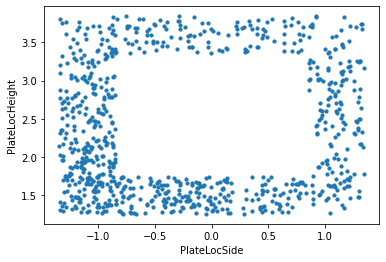

In [34]:
#Pitcher POV

shlig_shadow_college.plot.scatter(x = "PlateLocSide", y = "PlateLocHeight", s = 10)